# ไฟล์ของมดงานแบงค์ ใครเปิดเข้ามาต้องร่ายคาถา บาราชูบาชู๊ก่อน

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## disposible income by countries

In [37]:
income = pd.read_csv('../machine_learning_project/Data cleaned/raw/Disposable_income_adj.csv')
income 

,Geography,Category,Data Type,Unit,Currency Conversion,Current Constant,2011,2012,2013,2014,2015,2016,2017
0,Azerbaijan,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"12,100.4","13,387.7","15,171.3","16,581.1","17,582.4","19,983.5","23,225.3"
1,Bangladesh,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"68,540.6","78,411.0","88,036.1","98,314.5","110,726.9","123,994.2","140,115.3"
2,Cambodia,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"10,895.1","11,462.9","12,178.9","13,208.8","14,245.7","15,621.0","16,650.9"
3,China,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"3,881,003.1","4,352,694.4","4,824,248.7","5,274,231.8","5,715,663.3","6,227,634.1","6,905,378.4"
4,"Hong Kong, China",Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"197,233.6","210,413.9","225,046.0","238,473.1","251,846.5","259,548.5","279,337.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Spain,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"736,907.0","698,018.0","695,391.3","696,649.0","724,290.1","743,436.6","765,902.1"
99,Sweden,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"168,949.0","176,216.4","181,210.1","187,513.0","194,344.1","202,993.2","211,414.4"
100,Switzerland,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"410,435.0","416,011.6","425,268.0","429,824.9","429,682.3","434,565.4","435,272.0"
101,Turkey,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"40,401.6","44,848.7","52,616.2","59,424.4","67,770.2","75,273.9","89,600.5"


## combining values from different regions

top piracy (unlicensed) software (in USD) from each regions around the world


AP = Asia Pacific \
CEE = Central and Eastern Europe \
LA = Latin America \
MEA = Middle East and Africa \
NA = North America \
WE = Western Europe


In [38]:
regions_abbre = ['AP','CEE', 'LA', 'MEA', 'NA', 'WE']

data_frames = [pd.read_csv(f'../machine_learning_project/Data cleaned/raw/{region}_value.csv', index_col='Country') for region in regions_abbre]

In [39]:
regions_abbre = ['AP','CEE', 'LA', 'MEA', 'NA', 'WE']

# remove dollar sign to enable math computation
for index in range(len(data_frames)):
    for column in data_frames[index].columns:
        data_frames[index][column] = data_frames[index][column].str.replace('$', '')

# add 'region' column for each table
for (index, region) in zip(range(len(data_frames)), regions_abbre):
        data_frames[index]['region'] = f'{region}'

# assemble all the data tables into one long format table
data_long_format = pd.concat(data_frames)
data_long_format.to_csv('../machine_learning_project/Data cleaned/values_long_format.csv', index_label='Country')

In [40]:
data_long_format

,2017,2015,2013,2011,region
Country,,,,,
Australia,540,579,743,763,AP
Bangladesh,226,236,197,147,AP
Brunel,18,19,13,25,AP
China,"6,842","8,657","8,767","8,902",AP
Hong Kong,277,320,316,232,AP
...,...,...,...,...,...
Portugal,137,145,180,245,WE
Spain,859,913,"1,044","1,216",WE
Sweden,260,288,397,461,WE


## vistualisation
- Correlation/scattered plot between income and unliscensed software of all available counties (both are in USD) in 2017 (most recent year)
- Boxplot of unliscensed software by regions in 2017
- Compare over time (expect to see imporvements in some regions)
- ! but both table may have some differnt country's names

In [41]:
income_raw = pd.read_csv('../machine_learning_project/Data cleaned/data_for_analysis_revised/income.csv')
usage_raw = pd.read_csv('../machine_learning_project/Data cleaned/data_for_analysis_revised/usage.csv')

### checking NaN

In [42]:
income_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               609 non-null    object 
 1   Year                  609 non-null    int64  
 2   Income (Million USD)  609 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.4+ KB


In [43]:
usage_raw.info()
# we can actually see from the info that there is 340 non-null in Region col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              348 non-null    object
 1   Region               340 non-null    object
 2   Year                 348 non-null    int64 
 3   Usage (Million USD)  348 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


In [44]:
# check nulls of usage table
usage_nan_rows = usage_raw[usage_raw.isna().any(axis=1)]
usage_nan_rows

,Country,Region,Year,Usage (Million USD)
52,Canada,NaN,2017,819
53,Canada,NaN,2015,893
54,Canada,NaN,2013,1089
55,Canada,NaN,2011,1141
332,United States,NaN,2017,8612
333,United States,NaN,2015,9095
334,United States,NaN,2013,9737
335,United States,NaN,2011,9773


In [45]:
from operator import contains


usage_raw['Region'].fillna('NA', inplace=True)

usage_nan_rows = usage_raw[usage_raw.isna().any(axis=1)]
usage_nan_rows

,Country,Region,Year,Usage (Million USD)


In [46]:
# successfully add NA to the Region
show = pd.concat([usage_raw.loc[52:55, ['Country','Region']], 
                  usage_raw.loc[332:335, ['Country','Region']]])

show

,Country,Region
52,Canada,NA
53,Canada,NA
54,Canada,NA
55,Canada,NA
332,United States,NA
333,United States,NA
334,United States,NA
335,United States,NA


### pivot usage table

In [47]:
# pivot table
usage = usage_raw.pivot(index=['Country', 'Region'], columns='Year', values='Usage (Million USD)')

# add avg col
usage['avg'] = usage.mean(axis=1)

usage

,Year,2011,2013,2015,2017,avg
Country,Region,,,,,
Algeria,MEA,83,102,84,70,84.75
Argentina,LA,657,950,554,308,617.25
Australia,AP,763,743,579,540,656.25
Austria,WE,226,173,131,121,162.75
Azerbaijan,CEE,67,103,90,50,77.50
...,...,...,...,...,...,...
United Kingdom,WE,1943,2019,1935,1421,1829.50
United States,NA,9773,9737,9095,8612,9304.25
Uruguay,LA,85,74,57,51,66.75


In [48]:
# copy index
index_copy = usage.index

### pivot income table

In [49]:
income = income_raw.pivot(index= 'Country', columns='Year', values='Income (Million USD)')
income.drop([2012, 2014, 2016], axis=1, inplace=True)
income['avg'] = income.mean(axis=1)
income.index = index_copy

income

,Year,2011,2013,2015,2017,avg
Country,Region,,,,,
Algeria,MEA,34467.4,43674.5,51814.1,60716.2,4.766805e+04
Argentina,LA,4650.9,7409.8,13213.4,23968.3,1.231060e+04
Australia,AP,639048.1,693003.0,741755.6,790413.8,7.160551e+05
Austria,WE,198568.5,206326.4,214028.9,229636.2,2.121400e+05
Azerbaijan,CEE,12100.4,15171.3,17582.4,23225.3,1.701985e+04
...,...,...,...,...,...,...
United Kingdom,WE,1279739.7,1395491.8,1537294.1,1613225.1,1.456438e+06
United States,NA,11885359.0,12517532.0,13727521.0,14761069.0,1.322287e+07
Uruguay,LA,16238.0,20747.7,25579.0,30275.1,2.320995e+04


### avg scatter plot

In [50]:
# since we cant visualise a graph from multiple tables -> create new avg table start from creating usage table
avg_usg_inc = pd.DataFrame(data = usage['avg'], index = index_copy)
avg_usg_inc.rename(columns={'avg':'avg usage'}, inplace=True)

# add avg income into the table
avg_usg_inc['avg income'] = income['avg']

# convert indices into cols in order to use hue
avg_usg_inc = avg_usg_inc.reset_index()

avg_usg_inc

,Country,Region,avg usage,avg income
0,Algeria,MEA,84.75,4.766805e+04
1,Argentina,LA,617.25,1.231060e+04
2,Australia,AP,656.25,7.160551e+05
3,Austria,WE,162.75,2.121400e+05
4,Azerbaijan,CEE,77.50,1.701985e+04
...,...,...,...,...
82,United Kingdom,WE,1829.50,1.456438e+06
83,United States,NA,9304.25,1.322287e+07
84,Uruguay,LA,66.75,2.320995e+04
85,Venezuela,LA,604.25,0.000000e+00


In [51]:
# axis transformation
import numpy as np

avg_usg_inc['log_x'] = np.log10(avg_usg_inc['avg usage'])
avg_usg_inc['log_y'] = np.log10(avg_usg_inc['avg income'])

avg_usg_inc

/Users/chindanai/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Country,Region,avg usage,avg income,log_x,log_y
0,Algeria,MEA,84.75,4.766805e+04,1.928140,4.678227
1,Argentina,LA,617.25,1.231060e+04,2.790461,4.090279
2,Australia,AP,656.25,7.160551e+05,2.817069,5.854946
3,Austria,WE,162.75,2.121400e+05,2.211521,5.326623
4,Azerbaijan,CEE,77.50,1.701985e+04,1.889302,4.230956
...,...,...,...,...,...,...
82,United Kingdom,WE,1829.50,1.456438e+06,3.262332,6.163292
83,United States,NA,9304.25,1.322287e+07,3.968681,7.121326
84,Uruguay,LA,66.75,2.320995e+04,1.824451,4.365674
85,Venezuela,LA,604.25,0.000000e+00,2.781217,-inf


<Axes: xlabel='log_x', ylabel='log_y'>

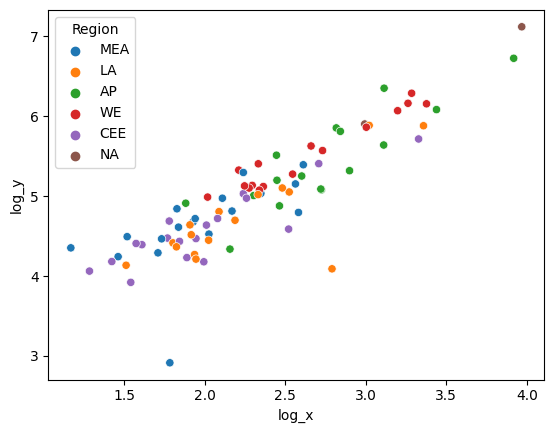

In [52]:
sns.scatterplot(x = avg_usg_inc['log_x'], y =avg_usg_inc['log_y'], hue = avg_usg_inc['Region'])

In [80]:
import numpy as np

perct_income = pd.read_csv('../machine_learning_project/Data cleaned/raw/perct_income_adj.csv')
perct_income['percent'] = perct_income['percent'].str.replace('%', '')
perct_income['percent'] = perct_income['percent'].astype(float)
perct_income['log_x'] = np.log10(perct_income['avg income'])
perct_income['log_y'] = np.log10(perct_income['percent'])
perct_income['round'] = perct_income['avg income'].round(2)

perct_income

/Users/chindanai/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Country,Region,percent,avg income,log_x,log_y,round
0,Lebanon,MEA,7.355,4.768763e+04,4.678406,0.866583,47687.63
1,Argentina,LA,5.191,1.856436e+04,4.268680,0.715251,18564.36
2,Ukraine,CEE,0.886,1.686167e+04,4.226901,-0.052566,16861.67
3,Sri Lanka,AP,0.660,7.154733e+05,5.854593,-0.180456,715473.34
4,Belarus,CEE,0.646,1.529260e+04,4.184481,-0.189767,15292.60
...,...,...,...,...,...,...,...
81,Belgium,WE,0.085,4.258656e+05,5.629273,-1.070581,425865.60
82,Austria,WE,0.077,1.454264e+06,6.162643,-1.113509,1454263.57
83,United States,NaN,0.070,1.323789e+07,7.121819,-1.154902,13237885.86
84,Cameroon,MEA,0.066,6.141936e+04,4.788305,-1.180456,61419.36


In [82]:
p2 = perct_income.sort_values("avg income")
p2

,Country,Region,percent,avg income,log_x,log_y,round
64,Mexico,LA,0.137,0.000000e+00,-inf,-0.863279,0.00
50,Qatar,MEA,0.169,8.259286e+02,2.916942,-0.772113,825.93
25,Serbia,CEE,0.256,8.207157e+03,3.914193,-0.591760,8207.16
18,Bulgaria,CEE,0.302,1.143786e+04,4.058345,-0.519993,11437.86
27,El Salvador,LA,0.244,1.355286e+04,4.132031,-0.612610,13552.86
...,...,...,...,...,...,...,...
82,Austria,WE,0.077,1.454264e+06,6.162643,-1.113509,1454263.57
61,Denmark,WE,0.145,1.944671e+06,6.288846,-0.838632,1944670.99
20,Indonesia,AP,0.296,2.246538e+06,6.351514,-0.528708,2246537.51
10,Vietnam,AP,0.430,5.311551e+06,6.725221,-0.366532,5311550.54


[None, None]

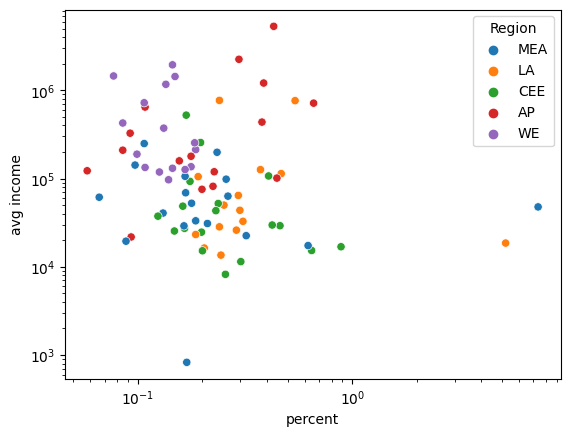

In [86]:
from matplotlib.pyplot import yscale
from pyparsing import alphanums


test = sns.scatterplot(x="percent", y="avg income",data=perct_income, hue = 'Region')
test.set(yscale="log", xscale="log")

In [73]:
perct_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     86 non-null     object 
 1   Region      84 non-null     object 
 2   percent     86 non-null     float64
 3   avg income  86 non-null     float64
 4   log_x       86 non-null     float64
 5   log_y       86 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.2+ KB


Text(0.5, 0, 'Average Income (log10 scale)')

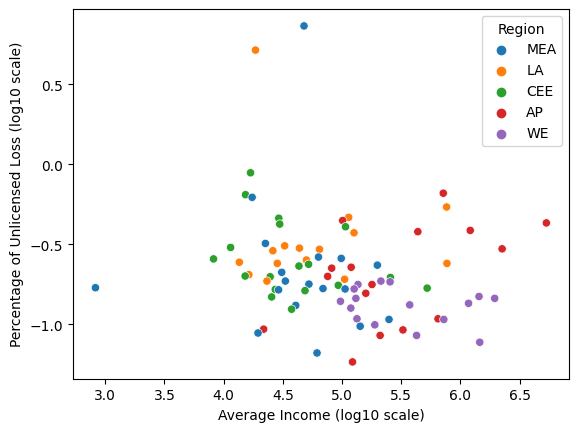

In [74]:
sns.scatterplot(x = perct_income['log_x'] , y = perct_income['log_y'], hue = perct_income['Region'])

plt.ylabel('Percentage of Unlicensed Loss (log10 scale)')
plt.xlabel('Average Income (log10 scale)')

In [75]:
sorted_mean = perct_income.groupby('Region')['log_y'].mean().sort_values().index
sorted_mean

Index(['WE', 'AP', 'MEA', 'CEE', 'LA'], dtype='object', name='Region')

Text(0, 0.5, 'Percentage of Unlicensed Loss (log10 scale)')

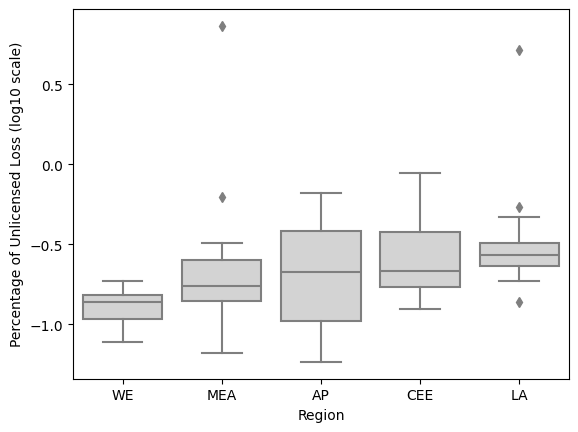

In [87]:
sorted_mean = perct_income.groupby('Region')['log_y'].median().sort_values().index
sns.boxplot(x = 'Region', y = 'log_y', data = perct_income, order = sorted_mean, color='lightgray')
plt.ylabel('Percentage of Unlicensed Loss (log10 scale)')